In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error

In [286]:
data = pd.read_csv("insurance_costs_1.csv")
data

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692
...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733
427,18,female,31.920,no,northeast,2205.98080
428,18,female,36.850,no,southeast,1629.83350
429,21,female,25.800,no,southwest,2007.94500


In [287]:
print("\n First few rows of columns :")
print(data.head())
print("\n Total number of values in each columns :")
print(data.count())
print("\n Summary of the datasets :")
print(data.info())
print("\n Statistical summary of each variable : ")
print(data.describe())


 First few rows of columns :
   age     sex     bmi smoker     region      charges
0   19  female  27.900    yes  southwest  16884.92400
1   33    male  22.705     no  northwest  21984.47061
2   32    male  28.880     no  northwest   3866.85520
3   31  female  25.740     no  southeast   3756.62160
4   60  female  25.840     no  northwest  28923.13692

 Total number of values in each columns :
age        431
sex        431
bmi        431
smoker     431
region     431
charges    431
dtype: int64

 Summary of the datasets :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB
N

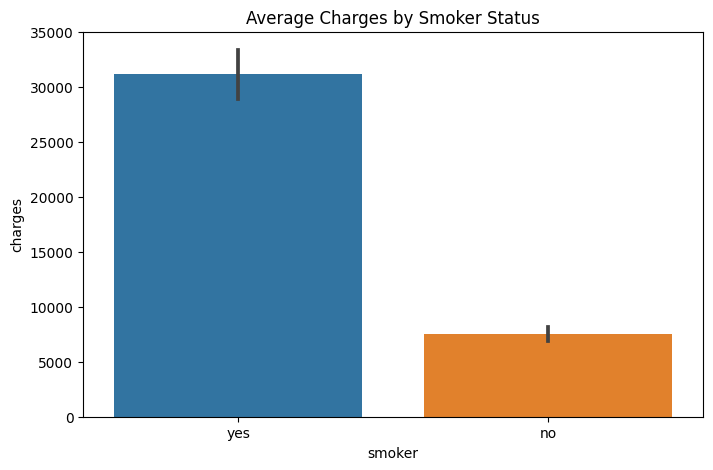

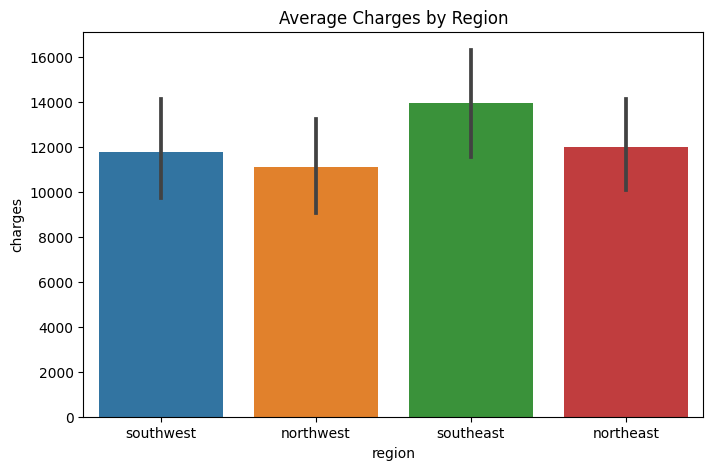

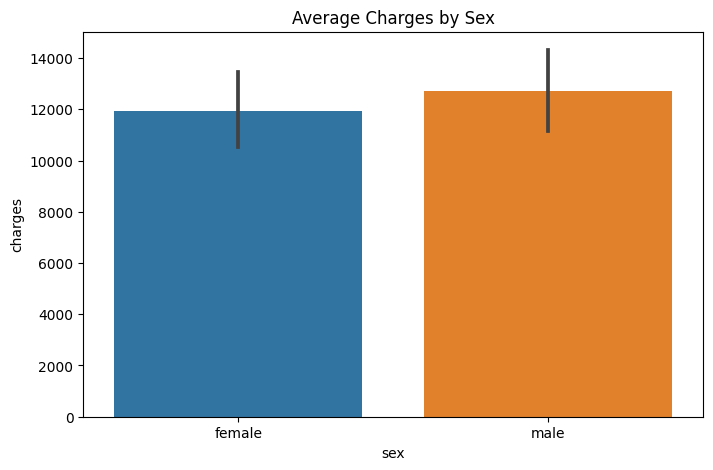

In [288]:
#Average Charges by Smoker Status
plt.figure(figsize=(8, 5))
sns.barplot(x='smoker', y='charges', data=data)
plt.title('Average Charges by Smoker Status')
plt.show()

#Average Charges by Region
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='charges', data=data)
plt.title('Average Charges by Region')
plt.show()

#Average Charges by sex
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='charges', data=data)
plt.title('Average Charges by Sex')
plt.show()


Average Charges by Smoker Status:
The bar plot shows sthe difference in the charges between smokers and non smokers, we can say that smoking is associated with higher health risk and by that increasing the charges, as smoker have higher average charges comapring to non smokers.

Average Charges by Region: The average charges seems to vary by region, even though there is not much difference in the average charges by the region, but we can say that southeast have the higher average charges.

Average Charges by Sex: The bar plot shows a difference in average charges between males and females. males have slightly higher average charges comapring to females , this can be because of the multiple factors like lifestyle or smoking.


Part Two: Simple Linear Models

1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [289]:
lr = LinearRegression()
X = data[['age']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lr_fit = lr.fit(X_train, y_train)
lr_fit.coef_

array([202.45606082])

In [290]:
y_preds = lr_fit.predict(X_test)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.16027712717096088
Mean Squared Error: 103394159.41425982


The lr_fit.coef_ value means that, on average, each additional year of age is associated with an increase of about 235.57 dollar in insurance charges, while everything else is constant, as we are only taking one variable that is age as a predictive variable.

Coming to R^2 value, the model does not fit the data well, as it's a low R^2 value. means, other variable play a significant role in the charges along with the age  

2. Make a model that also incorporates the variable sex. Report your results.



In [291]:
X = data[['age', 'sex']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

ct = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(sparse_output = False), ["sex"])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('model', LinearRegression())
])
pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex'])])),
                ('model', LinearRegression())])

In [292]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

model = pipeline.named_steps['model']
age_coef = model.coef_[1]
sex_coef = model.coef_[0]
intercept = model.intercept_

print(f"Coefficients for sex: {sex_coef}")
print(f"Coefficient for age: {age_coef}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

Coefficients for sex: -906.2607885400965
Coefficient for age: 906.2607885400989
Intercept: 5252.312995188782
R-squared: 0.1302105862496845
Mean Squared Error: 107096219.73158397


3. Now make a model that does not include sex, but does include smoker. Report your results.

In [293]:
X = data[['age', 'smoker']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

ct = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(sparse_output = False), ["smoker"])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('model', LinearRegression())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['smoker'])])),
                ('model', LinearRegression())])

In [294]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

model = pipeline.named_steps['model']
age_coef = model.coef_[1]
smoker_coef = model.coef_[0]
intercept = model.intercept_
print(model.coef_)
print(f"Coefficients for smoker: {smoker_coef}")
print(f"Coefficient for age: {age_coef}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

[-12184.08882588  12184.08882588    260.21186592]
Coefficients for smoker: -12184.088825884426
Coefficient for age: 12184.088825884388
Intercept: 9610.747385811932
R-squared: 0.732598767838633
Mean Squared Error: 32924821.41461298


4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.


The model Q3 that is age and smoker is better fit for the dataset, than Q2 model.
as the value of MSE is lower for Q3 and R^2 value is higher comparing to Q2.
it means the variable smoker is better predictore variable of model than sex for predicting the charges

**Part Three: Multiple Linear Models**

Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [295]:
X = data[['age', 'bmi']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_fit.coef_

array([192.95019421, 274.85679501])

In [296]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.19093570425126283
Mean Squared Error: 99619202.33184093


The R^2 value of the current model is higher than Q1, indicating this model is better, also the MSE of Q1 is higher than the current model , means the current model is better than Q1


2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [297]:
data['age_squared'] = data['age'] ** 2
X = data[['age', 'age_squared']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lr_fit = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_fit.coef_

array([235.71702762,  -0.41734452])

In [298]:
age_coef = lr.coef_[0]
age_squared_coef = lr.coef_[1]
intercept = lr.intercept_

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Age coefficient : {age_coef}")
print(f"Age Squared coefficient : {age_squared_coef}")
print(f"Intercept for model : {intercept}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


Age coefficient : 235.71702761642115
Age Squared coefficient : -0.417344516169896
Intercept for model : 4445.785608273771
R-squared: 0.16087206884635963
Mean Squared Error: 103320904.89611013


The R^2 value is higher in the model with age and age squared as predictors. it means this model explains more of the variance in the response variable, charges, than the model with age and sex.
The MSE is lower in the model with age and age squared. This means that, on average, the squared differences between the predicted charges and the actual charges are smaller, indicating a better fit.

we will prefer the model with age and age squared as a better fit model.


3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [299]:
X = data[['age']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_fit = lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
lr_fit.coef_

array([ 0.00000000e+00, -8.49361611e+03,  3.76711927e+02, -6.76432680e+00,
        4.28963793e-02])

In [300]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.16831787792598774
Mean Squared Error: 102404110.56329225


Comparing MSE and R^2 values, we will say model with degree 4 is better fit becasue of higher R^2 and less MSE values

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [301]:
X = data[['age']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

poly = PolynomialFeatures(degree=12)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_fit = lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
lr_fit.coef_

array([ 0.00000000e+00,  1.75128077e-06, -3.04805911e-09, -3.74500429e-08,
       -6.20117675e-07, -7.38511859e-06, -4.87996151e-05,  1.54392772e-05,
       -1.22341176e-06,  4.42242527e-08, -8.29783366e-10,  7.88310129e-12,
       -3.00352324e-14])

In [302]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.14560391279680274
Mean Squared Error: 105200856.26057781


Due to higher value of degree, model is facing overfitting issue and giving higher MSE and lower R^2 value comparing to the linear model in P2 Q1.

In this case we will prefer model P2 Q1.


5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

P2 Q3 model, simple linear model with age and smoker.

with highest R^2 and lowest MSE.


In [303]:

X = data[['age', 'bmi', 'sex', 'smoker', 'region']]
y = data['charges']
X = pd.get_dummies(X, drop_first=True)
full_model = sm.OLS(y, X).fit()
full_model_summary = full_model.summary()
print(full_model_summary)


                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              462.3
Date:                Tue, 07 Nov 2023   Prob (F-statistic):                   5.18e-194
Time:                        07:13:32   Log-Likelihood:                         -4347.6
No. Observations:                 431   AIC:                                      8709.
Df Residuals:                     424   BIC:                                      8738.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------


Commparing only for part 3, better fit model is P3 Q1, with highest R^2 and lowest MSE.


we can say it is the best model, as age and smoking habit does depends upon the charges, and by using the model summary we can say age and smoker are the most significant variable among others and can be used to predict and analyze the dataset.


6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


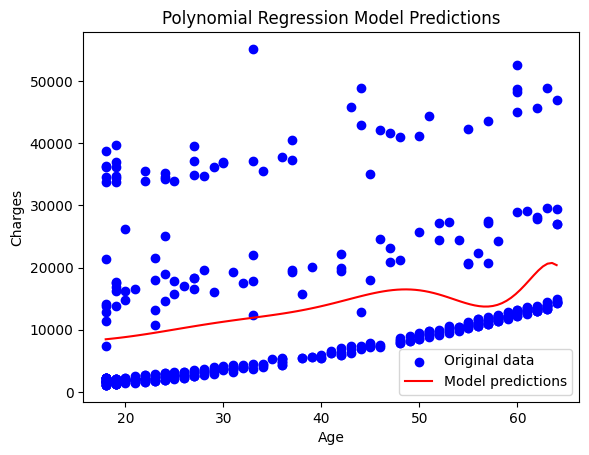

In [304]:
X = data[['age']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

poly = PolynomialFeatures(degree=12)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr_fit = lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
age_range = np.linspace(data['age'].min(), data['age'].max(), 100).reshape(-1, 1)
age_range_poly = poly.transform(age_range)
predicted_charges = lr.predict(age_range_poly)

plt.scatter(X, y, color='blue', label='Original data')


plt.plot(age_range, predicted_charges, color='red', label='Model predictions')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Polynomial Regression Model Predictions')
plt.legend()
plt.show()

**Part Four: New data**

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [305]:
data2 = pd.read_csv("insurance_costs_2.csv")

In [306]:
# Model 1: Only age as a predictor
X_o = data[['age']]
y_o = data['charges']
lr.fit(X_o, y_o)

X_n = data2[['age']]
y_n = data2['charges']
y_pred_n = lr.predict(X_n)

mse = mean_squared_error(y_n, y_pred_n)
r2 = r2_score(y_n, y_pred_n)
print(f'Model 1 R-squared: {r2}')
print(f'Model 1 MSE on new data: {mse}')


Model 1 R-squared: 0.12236515675533055
Model 1 MSE on new data: 136077136.50195494


In [307]:
# Model 2: Only age as a predictor
X_o = data[['age','bmi']]
y_o = data['charges']
lr.fit(X_o, y_o)

X_n = data2[['age','bmi']]
y_n = data2['charges']
y_pred_n = lr.predict(X_n)

mse = mean_squared_error(y_n, y_pred_n)
r2 = r2_score(y_n, y_pred_n)
print(f'Model 2 R-squared: {r2}')
print(f'Model 2 MSE on new data: {mse}')


Model 2 R-squared: 0.14455628272331222
Model 2 MSE on new data: 132636406.1108129


In [308]:
# Model age, bmi, and smoker as predictors (no interaction terms)
X_o = data[['age', 'bmi', 'smoker']]
y_o = data['charges']

ct = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(handle_unknown='ignore'), ["smoker"])
    ],
    remainder='passthrough'
)

model3 = Pipeline(steps=[
    ('preprocessor', ct),
    ('model', LinearRegression())
])

model3.fit(X_o, y_o)

X_n = data2[['age', 'bmi', 'smoker']]
y_n = data2['charges']
y_pred_n = model3.predict(X_n)
mse = mean_squared_error(y_n, y_pred_n)
r2 = r2_score(y_n, y_pred_n)
print(f'Model 3 R-squared: {r2}')
print(f'Model 3 MSE on new data: {mse}')

Model 3 R-squared: 0.7718311565047792
Model 3 MSE on new data: 35377541.241416454


In [309]:
# Model 4 ~ (age + bmi):smoker)

X_o = data[['age', 'bmi', 'smoker']]
y_o = data['charges']
ct = ColumnTransformer(
    transformers=[
        ('smoker', OneHotEncoder(handle_unknown='ignore'), ['smoker'])
    ],
    remainder='passthrough'
)

model4 = Pipeline([
    ('preprocessor', ct),
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False)),
    ('regressor', LinearRegression())
])

model4.fit(X_o, y_o)
X_n = data2[['age', 'bmi', 'smoker']]
y_n = data2['charges']

y_pred_n = model4.predict(X_n)
r2 = r2_score(y_n, y_pred_n)
mse = mean_squared_error(y_n, y_pred_n)

print(f"Model 4 R-squared: {r2}")
print(f"Model 4 Mean Squared Error: {mse}")


Model 4 R-squared: 0.8594950969902747
Model 4 Mean Squared Error: 21785261.846900187


In [310]:
X = data[['age', 'bmi', 'smoker']]
y = data['charges']

ct = ColumnTransformer(
    transformers=[
        ('smoker_encoder', OneHotEncoder(drop='first'), ['smoker'])
    ],
    remainder='passthrough'
)

X_transformed = ct.fit_transform(X)
X_transformed_df = pd.DataFrame(
    X_transformed,
    columns=['smoker_yes', 'age', 'bmi']
)
X_transformed_df['age_smoker'] = X_transformed_df['age'] * X_transformed_df['smoker_yes']
X_transformed_df['bmi_smoker'] = X_transformed_df['bmi'] * X_transformed_df['smoker_yes']
# print(X_transformed_df['bmi_smoker'])

lr.fit(X_transformed_df, y)

X_new = data2[['age', 'bmi', 'smoker']]
y_new = data2['charges']
X_new_transformed = ct.transform(X_new)
X_new_transformed_df = pd.DataFrame(
    X_new_transformed,
    columns=['smoker_yes', 'age', 'bmi']
)
X_new_transformed_df['age_smoker'] = X_new_transformed_df['smoker_yes'] * X_new_transformed_df['age']
X_new_transformed_df['bmi_smoker'] = X_new_transformed_df['smoker_yes'] * X_new_transformed_df['bmi']

y_pred_new = lr.predict(X_new_transformed_df)

r2 = r2_score(y_new, y_pred_new)
mse = mean_squared_error(y_new, y_pred_new)
print(f"Model 5 R-squared: {r2}")
print(f"Model 5 Mean Squared Error: {mse}")


Model 5 R-squared: 0.859488679569962
Model 5 Mean Squared Error: 21786256.86685251


Between Model 4 and Model 5, there's a negligible difference in MSE and R-squared. Since both Model 4 and Model 5 have similar statistics, either could be considered the best based on this data alone. Given that Model 4 has an interaction term that could provide more insight into the relationship between the predictors and the outcome, best model can be model 4.




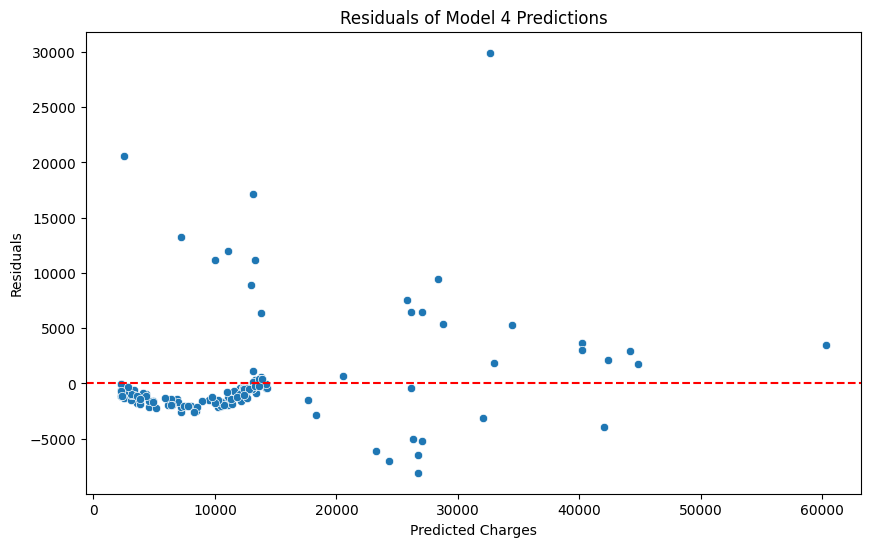

In [311]:
residuals = y_n - y_pred_n

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_n, y=residuals)
plt.title('Residuals of Model 4 Predictions')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**Part Five: Full Exploration**


Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.


I'll create 2 more models, along with model 4 that is best fit in the above questions.
these 2 models have age as a polynomial variables, and a single pipeline can be used for both the models.
best fit among these 3 can be determined based on R^2 and MSE.

In [312]:
X = data[['age', 'bmi', 'smoker']]
y = data['charges']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['age']])
X_poly_df = pd.DataFrame(X_poly, columns=['age', 'age_squared'])
X = pd.concat([X_poly_df, X[['bmi', 'smoker']]], axis=1)
ct = ColumnTransformer(
    transformers=[
        ('smoker_encoder', OneHotEncoder(drop='first'), ['smoker'])
    ],
    remainder='passthrough'
)
model2 = Pipeline([
    ('preprocessor', ct),
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False)),
    ('regressor', LinearRegression())
])

model2.fit(X, y)
X_new = data2[['age', 'bmi', 'smoker']]
X_new_poly = poly.transform(X_new[['age']])
X_new_poly_df = pd.DataFrame(X_new_poly, columns=['age', 'age_squared'])
X_new = pd.concat([X_new_poly_df, X_new[['bmi', 'smoker']]], axis=1)
y_new_2 = data2['charges']
y_pred_new_2 = model2.predict(X_new)

mse_new = mean_squared_error(y_new_2, y_pred_new_2)
r2_new = r2_score(y_new_2, y_pred_new_2)
print(f"Model 2 R-squared: {r2_new}")
print(f"Model 2 Mean Squared Error: {mse_new}")


Model 2 R-squared: 0.861382341204594
Model 2 Mean Squared Error: 21492644.945302486


In [313]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X[['age']])
X_poly_df = pd.DataFrame(X_poly, columns=['age', 'age_squared', 'age_cubed', 'age^4'])
X = pd.concat([X_poly_df, X[['bmi', 'smoker']]], axis=1)

model2.fit(X, y)
X_new_poly = poly.transform(X_new[['age']])
X_new_poly_df = pd.DataFrame(X_new_poly, columns=['age', 'age_squared', 'age_cubed', 'age^4'])
X_new = pd.concat([X_new_poly_df, X_new[['bmi', 'smoker']]], axis=1)
y_pred_new = model2.predict(X_new)
mse_new = mean_squared_error(y_new, y_pred_new)
r2_new = r2_score(y_new, y_pred_new)
print(f"Model 3 R-squared: {r2_new}")
print(f"Model 3 Mean Squared Error: {mse_new}")

Model 3 R-squared: 0.8579735223847373
Model 3 Mean Squared Error: 22021181.736463986


Based on the R-squared and Mean Squared Error (MSE) values, Model 2 is the best because it has the highest R-squared and the lowest MSE among the three models:

Model 2 R-squared: 0.861382341204594
Model 2 Mean Squared Error: 21492644.945302486



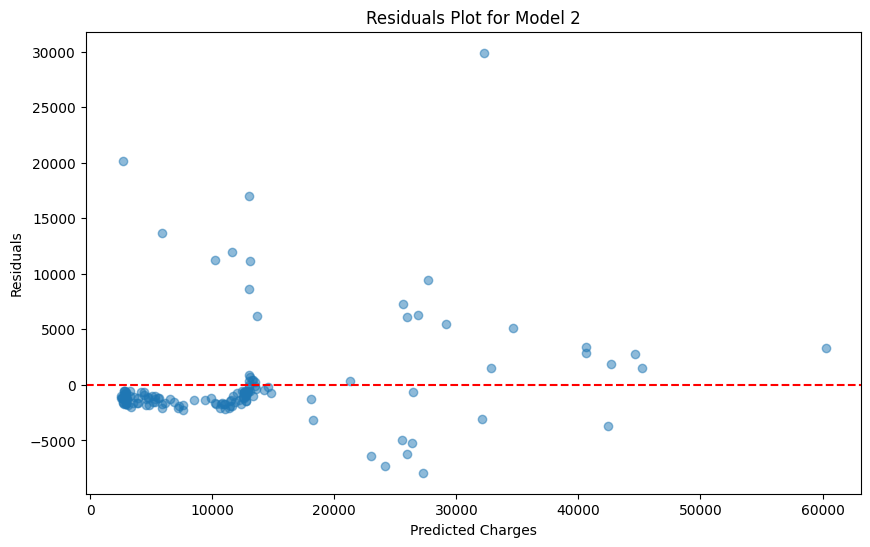

In [314]:
residuals = y_new_2 - y_pred_new_2

plt.figure(figsize=(10,6))
plt.scatter(y_pred_new, residuals, alpha=0.5)
plt.title('Residuals Plot for Model 2')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
